### Import the [ImageDataGenerator](https://keras.io/api/preprocessing/image/#imagedatagenerator-class) to load the images for the training, validation, and test sets

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd

Using TensorFlow backend.


### Check that the GPU can be found by the TensorFlow backend

In [2]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6223122042268642368
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4930941747
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11336013801223856554
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


### Load the shuffled training and test lists to pass to the generators to map the class labels to images for loading

In [3]:
train_df = pd.read_csv("train_df.csv")
test_df = pd.read_csv("test_df.csv")

In [4]:
print(train_df.head())
print(test_df.head())

      artist             album  \
0      starr         RingoRama   
1  mccartney  MemoryAlmostFull   
2      starr              YNot   
3      starr  BeaucoupsOfBlues   
4      starr     SmellTheRoses   

                                              song  
0             Memphis In Your Mind-0XwFvuUkN00.png  
1                Ever Present Past-raw_sIqjO3Y.png  
2              Ringo Starr - Y Not-s5H9yDn6jV4.png  
3                          Waiting-knEhJRs3QBY.png  
4  Ringo Starr Back - Off Boogaloo-fYOVk3P71yM.png  
    artist           album                                               song
0  Beatles  BeatlesForSale  Rock And Roll Music (Remastered 2009)-IRF6nmqc...
1  Beatles       SgtPepper  Good Morning Good Morning (Remastered 2009)-sj...
2  Beatles       AbbeyRoad  You Never Give Me Your Money (2019 Mix)-W8uZje...
3  Beatles       SgtPepper  Being For The Benefit Of Mr. Kite! (Remastered...
4  Beatles  BeatlesForSale     Mr Moonlight (Remastered 2009)-FZQ8nWZJrhA.png


## Set the batch_size equal to 24, image size equal to (64, 64), and set the training and test paths for the image generators

In [5]:
batch_size = 24
target_size = (64,64)
train_path = "C:\\Users\\Alec\\MyPython\\Beatles\\train"
test_path = "C:\\Users\\Alec\\MyPython\\Beatles\\test"

In [6]:
datagen = ImageDataGenerator(rescale=1./255., validation_split=0.15)

In [7]:
train_gen = datagen.flow_from_dataframe(dataframe=train_df,
                                        directory=train_path,
                                        x_col="song",
                                        y_col="artist",
                                        batch_size=batch_size,
                                        target_size=target_size,
                                        class_mode="categorical",
                                        shuffle=True,
                                        seed=1,
                                        subset="training",
                                        save_format="png"
                                       )

Found 639 validated image filenames belonging to 4 classes.


In [8]:
valid_gen = datagen.flow_from_dataframe(dataframe=train_df,
                                        directory=train_path,
                                        x_col="song",
                                        y_col="artist",
                                        batch_size=batch_size,
                                        target_size=target_size,
                                        class_mode="categorical",
                                        shuffle=True,
                                        seed=1,
                                        subset="validation",
                                        save_format="png"
                                       )

Found 112 validated image filenames belonging to 4 classes.


In [9]:
# Set the steps per epoch
import numpy as np
steps_per_epoch = np.ceil(train_gen.samples/batch_size)
validation_steps = np.ceil(valid_gen.samples/batch_size)

### Import the Convolutional Neural Network layes to build the model

In [10]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense

### Build the CNN model by using a Sequential model, 2D convolutional, pooling, dropout, a 2D global average pooling, and a dense layer
### Use the softmax activation function with the final dense layer to predict the probabilities of each class for each sample

In [11]:
model1 = keras.Sequential()
model1.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(rate=0.5))

model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(rate=0.3))

model1.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(2,2))

model1.add(Conv2D(256, (3, 3), padding='same', activation='relu'))

model1.add(GlobalAveragePooling2D())
model1.add(Dense(4, activation='softmax'))
model1.build(input_shape=(None, *target_size, 3))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)      

### Use the Keras [Adam Optimizer](https://keras.io/api/optimizers/adam/) with the default parameters and the [Categorical Crossentropy loss function](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) with the default parameters to compile the model. We will also have the model compute the accuracy of the training and validation sets
### Let's use 75 epochs to train the model, using [.fit_generator](https://kite.com/python/docs/keras.Model.fit_generator)

In [12]:
model1.compile(keras.optimizers.Adam(), 
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
history1 = model1.fit_generator(train_gen,
                                validation_data=valid_gen,
                                epochs=75,
                                steps_per_epoch=steps_per_epoch,
                                validation_steps=validation_steps)

Epoch 1/75
27/27 [==============================] - 5s 192ms/step - loss: 1.3336 - accuracy: 0.3615 - val_loss: 1.3502 - val_accuracy: 0.3571
Epoch 2/75
27/27 [==============================] - 1s 47ms/step - loss: 1.3007 - accuracy: 0.3959 - val_loss: 1.3145 - val_accuracy: 0.3661
Epoch 3/75
27/27 [==============================] - 2s 57ms/step - loss: 1.2820 - accuracy: 0.4366 - val_loss: 1.3841 - val_accuracy: 0.3482
Epoch 4/75
27/27 [==============================] - 2s 57ms/step - loss: 1.2720 - accuracy: 0.4335 - val_loss: 1.3085 - val_accuracy: 0.4107
Epoch 5/75
27/27 [==============================] - 2s 57ms/step - loss: 1.2562 - accuracy: 0.4397 - val_loss: 1.3778 - val_accuracy: 0.4196
Epoch 6/75
27/27 [==============================] - 2s 58ms/step - loss: 1.2545 - accuracy: 0.4319 - val_loss: 1.2579 - val_accuracy: 0.3750
Epoch 7/75
27/27 [==============================] - 2s 60ms/step - loss: 1.2516 - accuracy: 0.4491 - val_loss: 1.2889 - val_accuracy: 0.4018
Epoch 8/75
2

### Save the weights and the model to use later if needed

In [13]:
model1.save_weights("models/cnn_77_24_(64_64)_weights.hdf5")
model1.save("models/cnn_77_24_(64_64)_model.h5")

### Plot the loss and accuracy of the training and validation sets to visualize how the model performed over the range of epochs
### Will use the code from Sabastian Raschka's Python for Machine Learning textbook, and wrap it in a fuction

In [14]:
import matplotlib.pyplot as plt

def plot_loss_and_acc(history):
    hist = history.history
    x_arr = np.arange(len(hist['loss'])) + 1
    fig = plt.figure(figsize=(12,4))
    ax = fig.add_subplot(1,2,1)
    ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
    ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
    ax.legend(fontsize=15)
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Loss', size=15)

    ax = fig.add_subplot(1,2,2)
    ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
    ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
    ax.legend(fontsize=15)
    ax.set_xlabel('Epoch', size=15),
    ax.set_ylabel('Accuracy', size=15)
    plt.show()

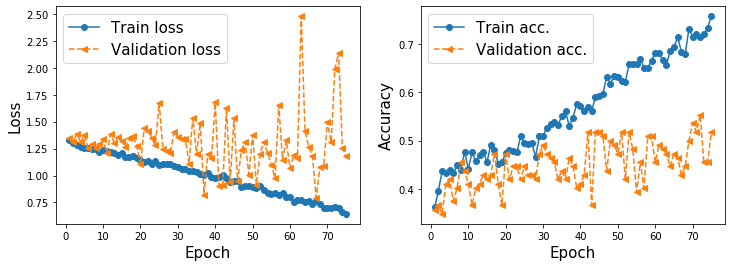

In [15]:
plot_loss_and_acc(history1)

### It appears that the validation accuracy stabilizes around 50 epochs. Let's try running that

In [33]:
model2 = keras.Sequential()
model2.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(rate=0.5))

model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(2,2))
model1.add(Dropout(rate=0.3))

model2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(2,2))

model2.add(Conv2D(256, (3, 3), padding='same', activation='relu'))

model2.add(GlobalAveragePooling2D())
model2.add(Dense(4, activation='softmax'))
model2.build(input_shape=(None, *target_size, 3))

model2.compile(keras.optimizers.Adam(), 
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
history2 = model2.fit_generator(train_gen,
                                validation_data=valid_gen,
                                epochs=50,
                                steps_per_epoch=steps_per_epoch,
                                validation_steps=validation_steps)

Epoch 1/50
27/27 [==============================] - 1s 34ms/step - loss: 1.3400 - accuracy: 0.3756 - val_loss: 1.3636 - val_accuracy: 0.3036
Epoch 2/50
27/27 [==============================] - 1s 33ms/step - loss: 1.3058 - accuracy: 0.3756 - val_loss: 1.3181 - val_accuracy: 0.3571
Epoch 3/50
27/27 [==============================] - 1s 35ms/step - loss: 1.2950 - accuracy: 0.3897 - val_loss: 1.3803 - val_accuracy: 0.4196
Epoch 4/50
27/27 [==============================] - 1s 34ms/step - loss: 1.2915 - accuracy: 0.4038 - val_loss: 1.2763 - val_accuracy: 0.4107
Epoch 5/50
27/27 [==============================] - 1s 34ms/step - loss: 1.2784 - accuracy: 0.4507 - val_loss: 1.2990 - val_accuracy: 0.4286
Epoch 6/50
27/27 [==============================] - 1s 34ms/step - loss: 1.2646 - accuracy: 0.4319 - val_loss: 1.3961 - val_accuracy: 0.4018
Epoch 7/50
27/27 [==============================] - 1s 35ms/step - loss: 1.2298 - accuracy: 0.4570 - val_loss: 1.2068 - val_accuracy: 0.3661
Epoch 8/50
27

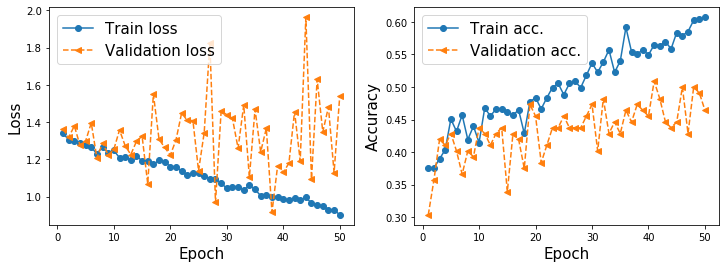

In [34]:
plot_loss_and_acc(history2)

### Not getting the best results. Let's use the [Stochastic Gradient Descent Optimizer](https://keras.io/api/optimizers/sgd/) and set the learning rate to 0.0001

In [35]:
model3 = keras.Sequential()
model3.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(rate=0.5))

model3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(rate=0.3))

model3.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(2,2))

model3.add(Conv2D(256, (3, 3), padding='same', activation='relu'))

model3.add(GlobalAveragePooling2D())
model3.add(Dense(4, activation='softmax'))
model3.build(input_shape=(None, *target_size, 3))

model3.compile(keras.optimizers.SGD(0.0001), 
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
history3 = model3.fit_generator(train_gen,
                                validation_data=valid_gen,
                                epochs=75,
                                steps_per_epoch=steps_per_epoch,
                                validation_steps=validation_steps)

Epoch 1/75
27/27 [==============================] - 1s 34ms/step - loss: 1.3930 - accuracy: 0.3052 - val_loss: 1.3731 - val_accuracy: 0.3036
Epoch 2/75
27/27 [==============================] - 1s 33ms/step - loss: 1.3872 - accuracy: 0.3052 - val_loss: 1.3907 - val_accuracy: 0.3036
Epoch 3/75
27/27 [==============================] - 1s 35ms/step - loss: 1.3813 - accuracy: 0.3052 - val_loss: 1.3825 - val_accuracy: 0.3036
Epoch 4/75
27/27 [==============================] - 1s 34ms/step - loss: 1.3758 - accuracy: 0.3052 - val_loss: 1.3945 - val_accuracy: 0.3036
Epoch 5/75
27/27 [==============================] - 1s 34ms/step - loss: 1.3703 - accuracy: 0.3052 - val_loss: 1.3942 - val_accuracy: 0.3036
Epoch 6/75
27/27 [==============================] - 1s 34ms/step - loss: 1.3658 - accuracy: 0.3052 - val_loss: 1.3893 - val_accuracy: 0.3036
Epoch 7/75
27/27 [==============================] - 1s 35ms/step - loss: 1.3608 - accuracy: 0.3052 - val_loss: 1.3711 - val_accuracy: 0.3036
Epoch 8/75
27

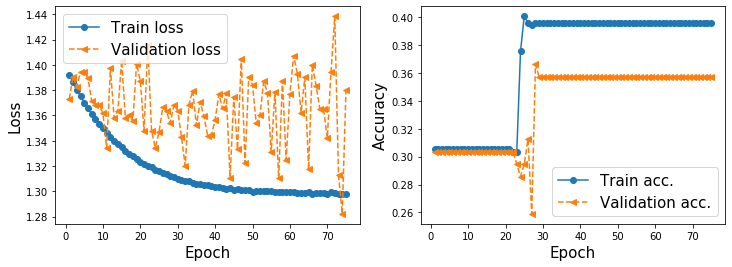

In [36]:
plot_loss_and_acc(history3)

In [37]:
model4 = keras.Sequential()
model4.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model4.add(MaxPooling2D(2,2))
model4.add(Dropout(rate=0.5))

model4.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(MaxPooling2D(2,2))
model4.add(Dropout(rate=0.3))

model4.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model4.add(MaxPooling2D(2,2))

model4.add(Conv2D(256, (3, 3), padding='same', activation='relu'))

model4.add(GlobalAveragePooling2D())
model4.add(Dense(4, activation='softmax'))
model4.build(input_shape=(None, *target_size, 3))

model4.compile(keras.optimizers.SGD(0.1), 
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
history4 = model4.fit_generator(train_gen,
                                validation_data=valid_gen,
                                epochs=75,
                                steps_per_epoch=steps_per_epoch,
                                validation_steps=validation_steps)

Epoch 1/75
27/27 [==============================] - 1s 38ms/step - loss: 1.3260 - accuracy: 0.3646 - val_loss: 1.3738 - val_accuracy: 0.3571
Epoch 2/75
27/27 [==============================] - 1s 32ms/step - loss: 1.3076 - accuracy: 0.3912 - val_loss: 1.4171 - val_accuracy: 0.3571
Epoch 3/75
27/27 [==============================] - 1s 34ms/step - loss: 1.2970 - accuracy: 0.3975 - val_loss: 1.3396 - val_accuracy: 0.3571
Epoch 4/75
27/27 [==============================] - 1s 34ms/step - loss: 1.2996 - accuracy: 0.4038 - val_loss: 1.3689 - val_accuracy: 0.3571
Epoch 5/75
27/27 [==============================] - 1s 34ms/step - loss: 1.2834 - accuracy: 0.4100 - val_loss: 1.2664 - val_accuracy: 0.3839
Epoch 6/75
27/27 [==============================] - 1s 34ms/step - loss: 1.2830 - accuracy: 0.4069 - val_loss: 1.1933 - val_accuracy: 0.3393
Epoch 7/75
27/27 [==============================] - 1s 34ms/step - loss: 1.2810 - accuracy: 0.4319 - val_loss: 1.2594 - val_accuracy: 0.3661
Epoch 8/75
27

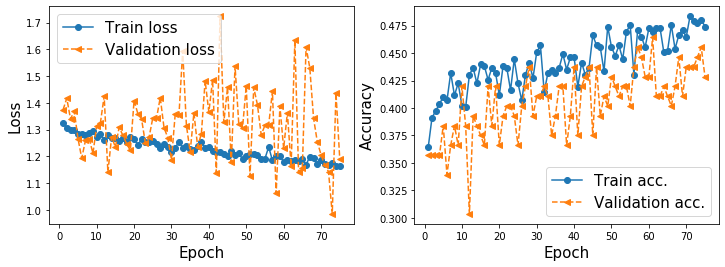

In [38]:
plot_loss_and_acc(history4)

In [39]:
model5 = keras.Sequential()
model5.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model5.add(MaxPooling2D(2,2))
model5.add(Dropout(rate=0.5))

model5.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model5.add(MaxPooling2D(2,2))
model5.add(Dropout(rate=0.3))

model5.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model5.add(MaxPooling2D(2,2))

model5.add(Conv2D(256, (3, 3), padding='same', activation='relu'))

model5.add(GlobalAveragePooling2D())
model5.add(Dense(4, activation='softmax'))
model5.build(input_shape=(None, *target_size, 3))

model5.compile(keras.optimizers.SGD(0.1), 
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
history5 = model5.fit_generator(train_gen,
                                validation_data=valid_gen,
                                epochs=150,
                                steps_per_epoch=steps_per_epoch,
                                validation_steps=validation_steps)

Epoch 1/150
27/27 [==============================] - 1s 34ms/step - loss: 1.3148 - accuracy: 0.3881 - val_loss: 1.3458 - val_accuracy: 0.3036
Epoch 2/150
27/27 [==============================] - 1s 33ms/step - loss: 1.3086 - accuracy: 0.3787 - val_loss: 1.3332 - val_accuracy: 0.3571
Epoch 3/150
27/27 [==============================] - 1s 34ms/step - loss: 1.2874 - accuracy: 0.4210 - val_loss: 1.3303 - val_accuracy: 0.3571
Epoch 4/150
27/27 [==============================] - 1s 34ms/step - loss: 1.2771 - accuracy: 0.4272 - val_loss: 1.3461 - val_accuracy: 0.3571
Epoch 5/150
27/27 [==============================] - 1s 38ms/step - loss: 1.2785 - accuracy: 0.4053 - val_loss: 1.1398 - val_accuracy: 0.3661
Epoch 6/150
27/27 [==============================] - 1s 38ms/step - loss: 1.2869 - accuracy: 0.4085 - val_loss: 1.3835 - val_accuracy: 0.3839
Epoch 7/150
27/27 [==============================] - 1s 35ms/step - loss: 1.2847 - accuracy: 0.4210 - val_loss: 1.2824 - val_accuracy: 0.3661
Epoch 

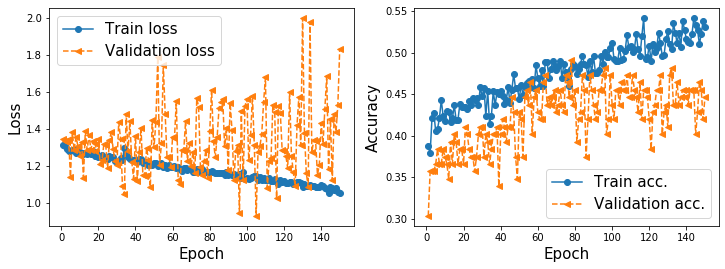

In [40]:
plot_loss_and_acc(history5)

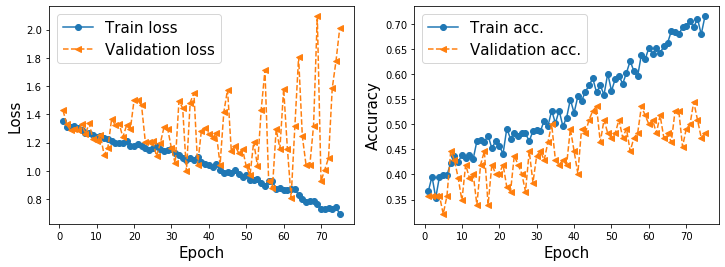

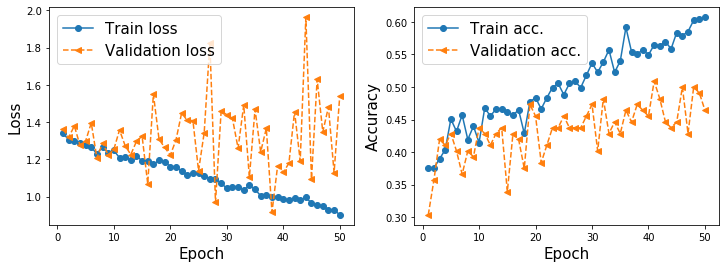

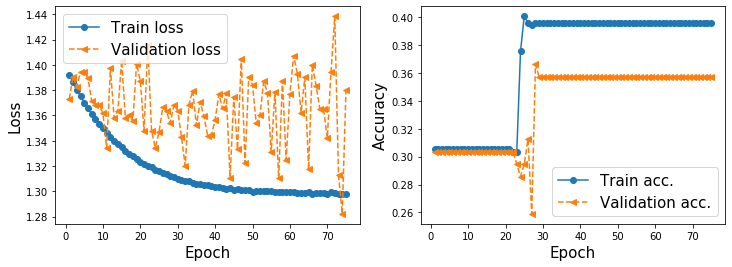

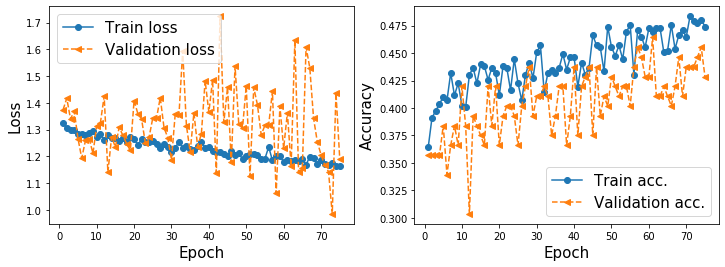

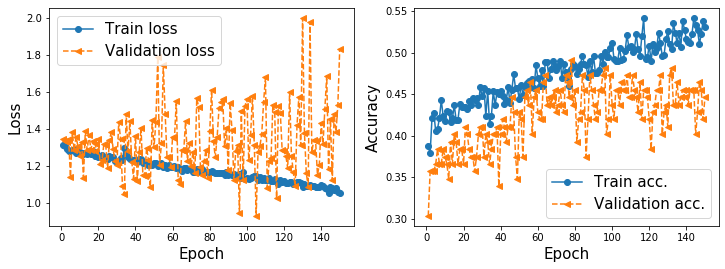

In [42]:
for hist in [history1, history2, history3, history4, history5]:
    plot_loss_and_acc(hist)

In [52]:
str(model1.optimizer.__class__).split(".")[-1]

"Adam'>"